## Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from numpy.polynomial.polynomial import polyfit
import warnings
import itertools

In [2]:
stores = pd.read_csv('C:\\Users\\desmo\\AppData\\Local\\Programs\\Python\\Python38-32\\Data Sets\\Retail Data\\datasets_2296_3883_stores data-set.csv')

In [3]:
features = pd.read_csv('C:\\Users\\desmo\\AppData\\Local\\Programs\\Python\\Python38-32\\Data Sets\\Retail Data\\datasets_2296_3883_Features data set.csv', parse_dates=['Date'])

In [4]:
sales = pd.read_csv('C:\\Users\\desmo\\AppData\\Local\\Programs\\Python\\Python38-32\\Data Sets\\Retail Data\\sales data-set.csv', parse_dates=['Date'])

In [5]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [7]:
sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-05-10,628.10,False
421567,45,98,2012-12-10,1061.02,False
421568,45,98,2012-10-19,760.01,False


# Dataframes Merging

In [8]:
new_df = pd.merge(features, sales,  how='left', left_on=['Store','Date'], right_on = ['Store','Date'])

In [9]:
new_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1.0,24924.50,False
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2.0,50605.27,False
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3.0,13740.12,False
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4.0,39954.04,False
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5.0,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,NaN,NaN,NaN
423321,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,NaN,NaN
423322,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,NaN,NaN
423323,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,NaN,NaN


In [10]:
df = pd.merge(new_df, stores, how='left', left_on=['Store'], right_on=['Store'])

In [11]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1.0,24924.50,False,A,151315
1,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2.0,50605.27,False,A,151315
2,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3.0,13740.12,False,A,151315
3,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4.0,39954.04,False,A,151315
4,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5.0,32229.38,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,NaN,NaN,NaN,B,118221
423321,45,2013-05-07,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,NaN,NaN,NaN,B,118221
423322,45,2013-12-07,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,NaN,NaN,NaN,B,118221
423323,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,NaN,NaN,NaN,B,118221


# Data Cleaning

In [12]:
info = pd.DataFrame(df.dtypes).T.rename(index = {0: 'Column Type'})
info = info.append(pd.DataFrame(df.isnull().sum()).T.rename(index = {0: 'null values (nb)'}))
info = info.append((pd.DataFrame(df.isnull().sum()/df.shape[0]*100).round(1)).T.rename(index = {0:'null values {%}'}))
info

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size
Column Type,int64,datetime64[ns],float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float64,object,object,int64
null values (nb),0,0,0,0,270892,310793,284667,286859,270138,585,585,0,1755,1755,1755,0,0
null values {%},0,0,0,0,64,73.4,67.2,67.8,63.8,0.1,0.1,0,0.4,0.4,0.4,0,0


In [13]:
df.dropna(subset=['Weekly_Sales'], inplace = True)

In [14]:
df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'IsHoliday_y'],inplace=True)

In [15]:
date = df['Date']
df['Date'] = pd.to_datetime(date, dayfirst = True)

In [16]:
df.tail()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,Type,Size
423281,45,2012-10-26,58.85,3.882,192.308899,8.667,False,93.0,2487.80,B,118221
423282,45,2012-10-26,58.85,3.882,192.308899,8.667,False,94.0,5203.31,B,118221
423283,45,2012-10-26,58.85,3.882,192.308899,8.667,False,95.0,56017.47,B,118221
423284,45,2012-10-26,58.85,3.882,192.308899,8.667,False,97.0,6817.48,B,118221
423285,45,2012-10-26,58.85,3.882,192.308899,8.667,False,98.0,1076.80,B,118221


In [17]:
df.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday_x     0
Dept            0
Weekly_Sales    0
Type            0
Size            0
dtype: int64

# Data Aggregation, Exploratory Data Analysis

In [18]:
grouped_date = df.groupby("Date").agg({"Temperature":"mean"
                                            ,"Fuel_Price":"mean"
                                            ,"IsHoliday_x":"mean"
                                            ,"CPI":"mean"
                                           ,"Unemployment":"mean",
                                       'Size': "sum",
                                       "Weekly_Sales":"sum"}).sort_index()

grouped_date['Weekly_Sales'] = grouped_date['Weekly_Sales'].apply(int)

In [19]:
grouped_date

,Temperature,Fuel_Price,IsHoliday_x,CPI,Unemployment,Size,Weekly_Sales
Date,,,,,,,
2010-01-10,69.386998,2.733064,False,168.004935,8.433960,401124362,42239875
2010-02-04,52.587887,2.825453,False,167.377836,8.441092,404949417,50423831
2010-02-07,76.555955,2.793190,False,167.663264,8.373801,400777778,48917484
2010-02-19,37.038310,2.673666,False,167.338966,8.576351,408678503,48276993
2010-02-26,38.629563,2.685642,False,167.691019,8.561375,405309063,43968571
...,...,...,...,...,...,...,...
2012-10-08,81.164112,3.633858,False,175.378772,7.224676,403290230,47403451
2012-10-19,60.152756,3.878413,False,176.295499,6.948928,400883123,45122410
2012-10-26,60.530277,3.791086,False,176.182886,6.943212,402759569,45544116


In [20]:
grouped_date.describe()

,Temperature,Fuel_Price,CPI,Unemployment,Size,Weekly_Sales
count,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02
mean,60.141472,3.359418,171.186095,7.962458,4.030796e+08,4.711342e+07
std,15.243981,0.429803,3.080271,0.470361,2.959961e+06,5.444206e+06
min,29.807584,2.673666,167.065968,6.942141,3.968156e+08,3.959985e+07
25%,47.176068,2.884495,168.004929,7.484837,4.009437e+08,4.488059e+07
50%,60.530277,3.490246,171.018134,8.096383,4.031158e+08,4.624390e+07
75%,74.208439,3.729174,174.316614,8.388105,4.047454e+08,4.779202e+07
max,81.886773,3.997432,176.295499,8.580858,4.130720e+08,8.093142e+07


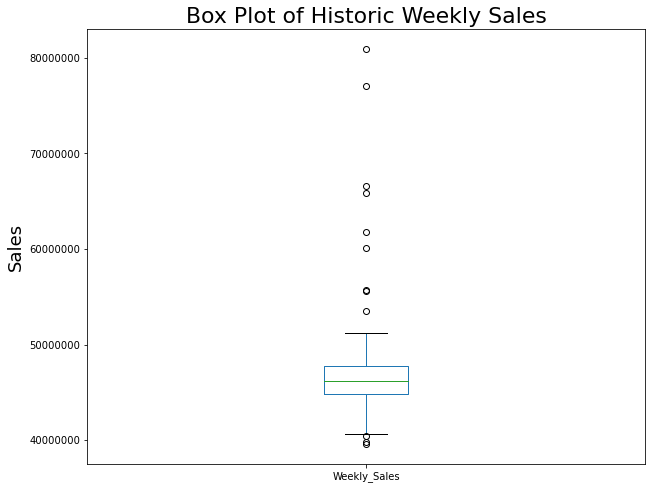

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
grouped_date['Weekly_Sales'].plot.box()
plt.ylabel('Sales', size = 18)
plt.title('Box Plot of Historic Weekly Sales', size = 22)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

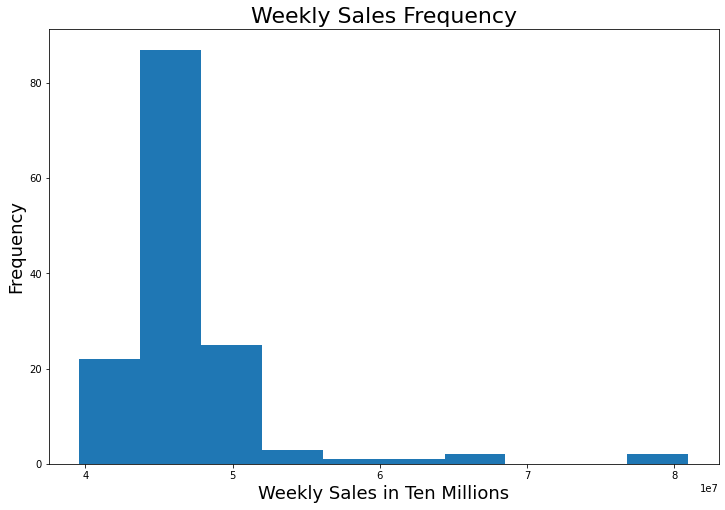

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
grouped_date['Weekly_Sales'].plot(kind='hist', ax=ax)
plt.xlabel('Weekly Sales in Ten Millions', size = 18)
plt.ylabel('Frequency', size = 18)
plt.title('Weekly Sales Frequency', size = 22)
plt.show()

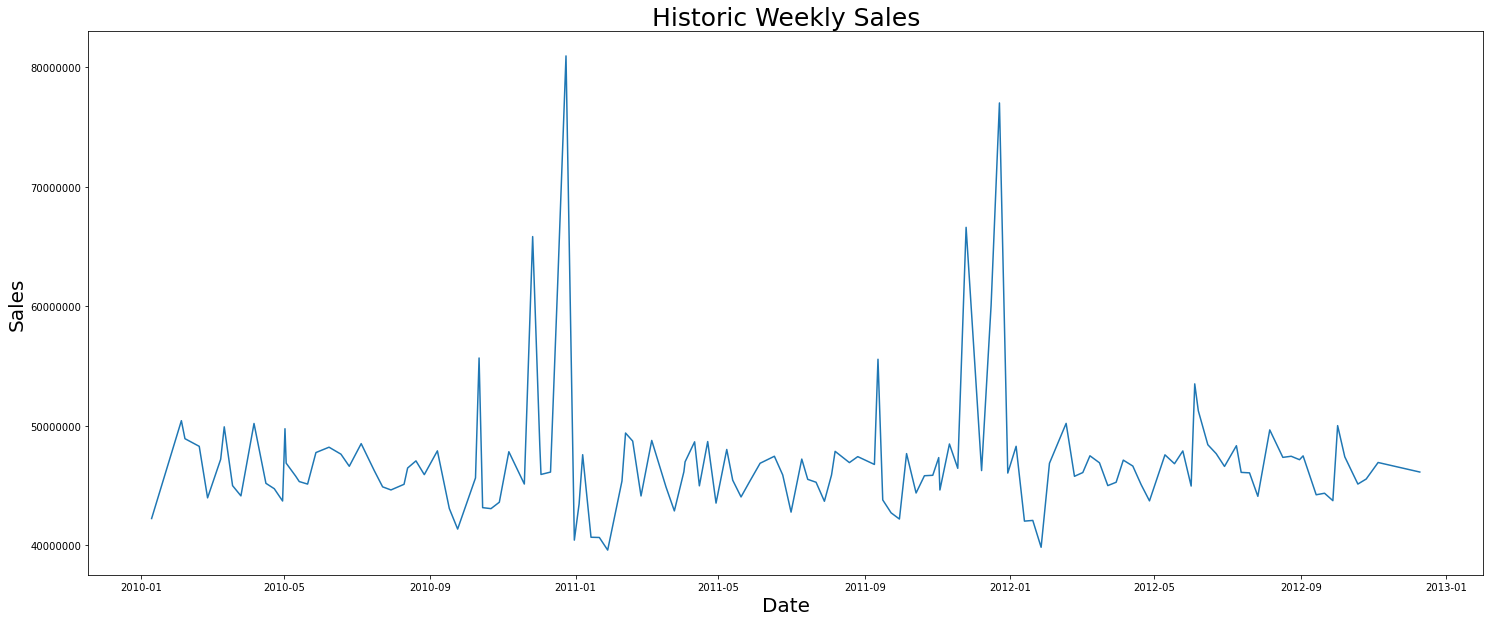

In [23]:
plt.figure(figsize=(25,10))
plt.plot(grouped_date.index, grouped_date.Weekly_Sales)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Date', size = 20)
plt.ylabel('Sales', size = 20)
plt.title('Historic Weekly Sales', size = 25)
plt.show()

<AxesSubplot:title={'center':'Unemployment'}, xlabel='Date'>

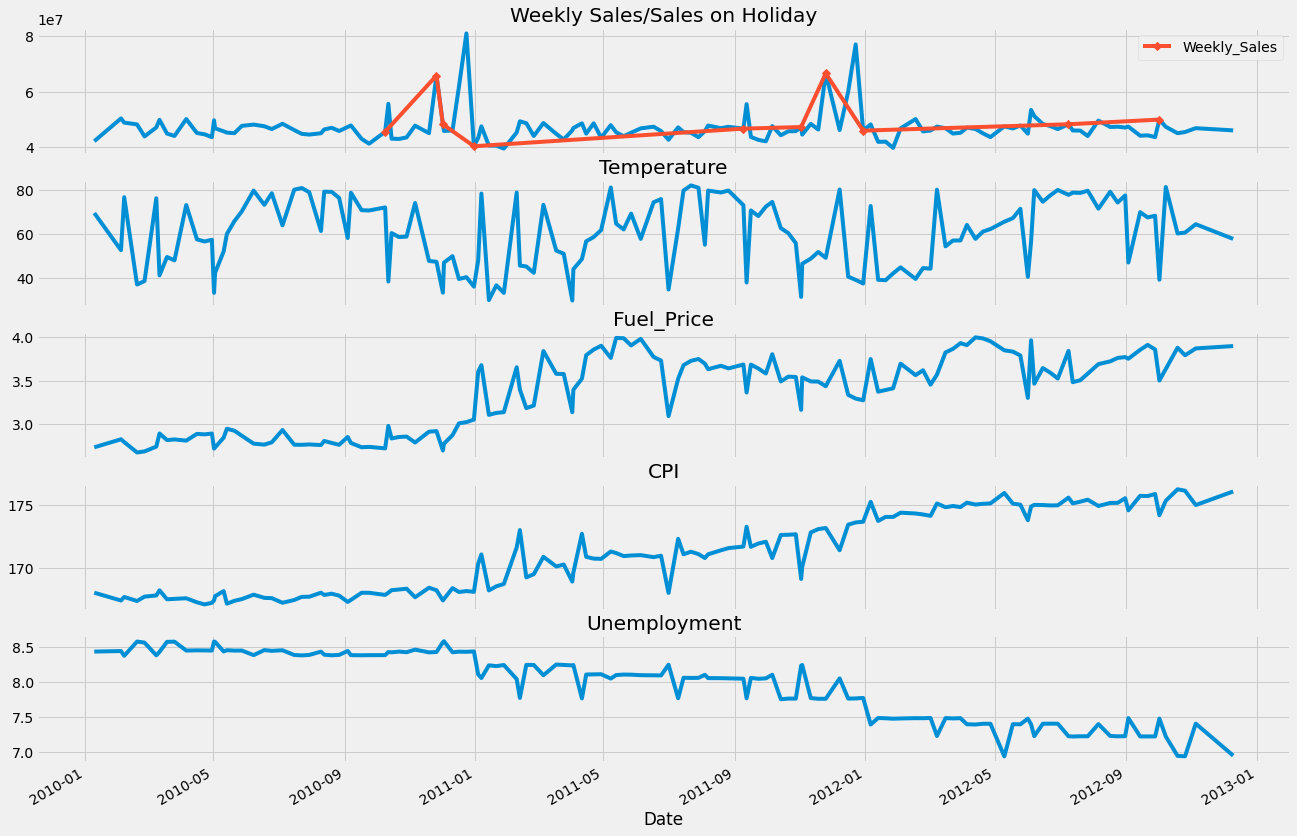

In [24]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(5,1,figsize=(20,15),sharex=True) 
grouped_date["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/Sales on Holiday")
grouped_date[grouped_date.IsHoliday_x==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")
grouped_date["Temperature"].plot(ax=ax[1], title="Temperature")
grouped_date["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
grouped_date["CPI"].plot(ax=ax[3],title="CPI")
grouped_date["Unemployment"].plot(ax=ax[4],title="Unemployment")

# Correlation Analysis

In [39]:
agg_corr = grouped_date.corr()
agg_corr

,Temperature,Fuel_Price,IsHoliday_x,CPI,Unemployment,Size,Weekly_Sales
Temperature,1.0,0.20579352615761012,-0.1893141806078954,0.1523099540938109,-0.1671358610927761,-0.5070938183982592,-0.15860254724476278
Fuel_Price,0.20579352615761012,1.0,-0.08365418194089423,0.8246480470043202,-0.7508920274167431,0.2323511234554915,-0.05637101471192179
IsHoliday_x,-0.1893141806078954,-0.08365418194089423,1.0,-0.025266629621601876,0.04185928791737741,0.2657771648714997,0.17268293616890956
CPI,0.1523099540938109,0.8246480470043202,-0.025266629621601876,1.0,-0.9768845097890599,0.37823350683065887,0.027008174737346624
Unemployment,-0.1671358610927761,-0.7508920274167431,0.04185928791737741,-0.9768845097890599,1.0,-0.31880032203225817,0.0034428767444594343
Size,-0.5070938183982592,0.2323511234554915,0.2657771648714997,0.37823350683065887,-0.31880032203225817,1.0,0.3989306416447245
Weekly_Sales,-0.15860254724476278,-0.05637101471192179,0.17268293616890956,0.027008174737346624,0.0034428767444594343,0.3989306416447245,1.0


In [40]:
agg_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Temperature,Fuel_Price,IsHoliday_x,CPI,Unemployment,Size,Weekly_Sales
Temperature,1.00,0.21,-0.19,0.15,-0.17,-0.51,-0.16
Fuel_Price,0.21,1.00,-0.08,0.82,-0.75,0.23,-0.06
IsHoliday_x,-0.19,-0.08,1.00,-0.03,0.04,0.27,0.17
CPI,0.15,0.82,-0.03,1.00,-0.98,0.38,0.03
Unemployment,-0.17,-0.75,0.04,-0.98,1.00,-0.32,0.00
Size,-0.51,0.23,0.27,0.38,-0.32,1.00,0.40
Weekly_Sales,-0.16,-0.06,0.17,0.03,0.00,0.40,1.00


<Figure size 432x288 with 0 Axes>

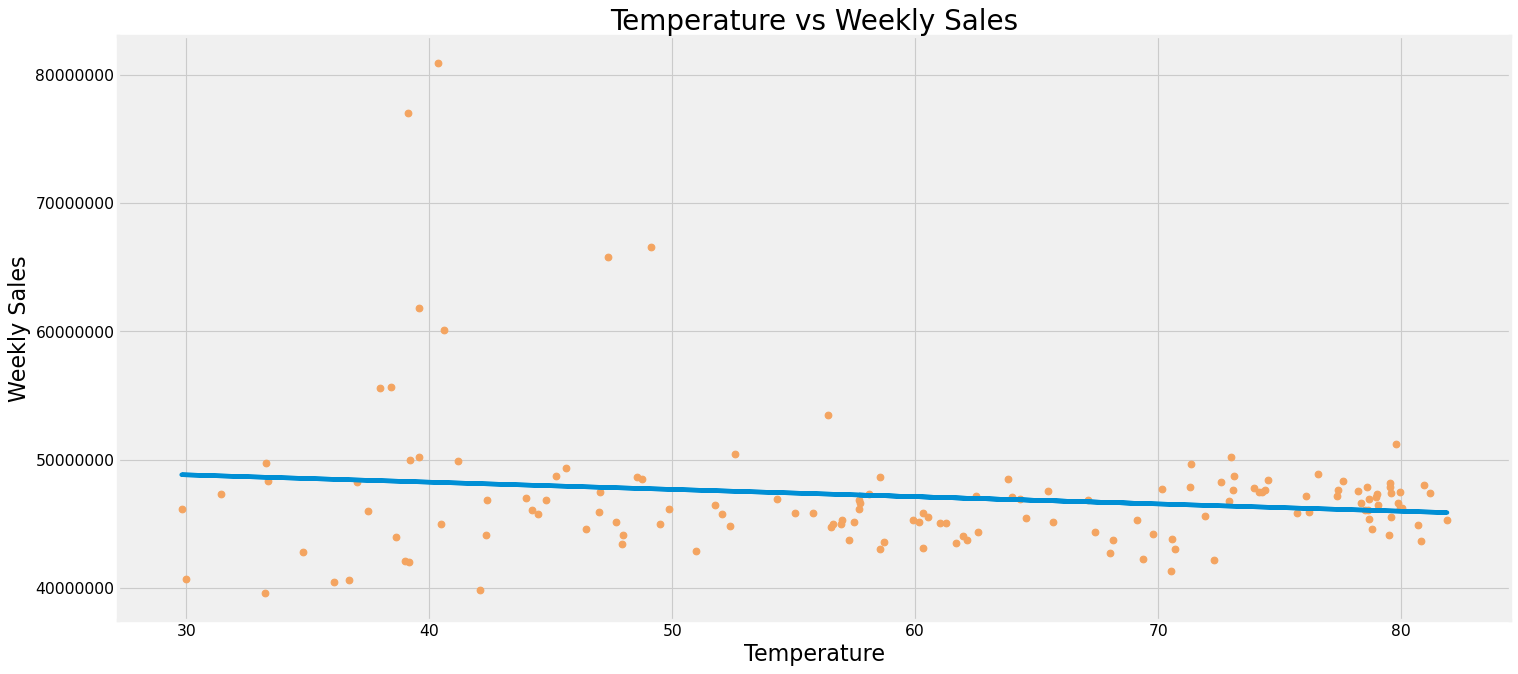

In [41]:
x = grouped_date['Temperature']
y = grouped_date['Weekly_Sales']

fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'Temperature vs Weekly Sales', fontsize=25)
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('Weekly Sales', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

<Figure size 432x288 with 0 Axes>

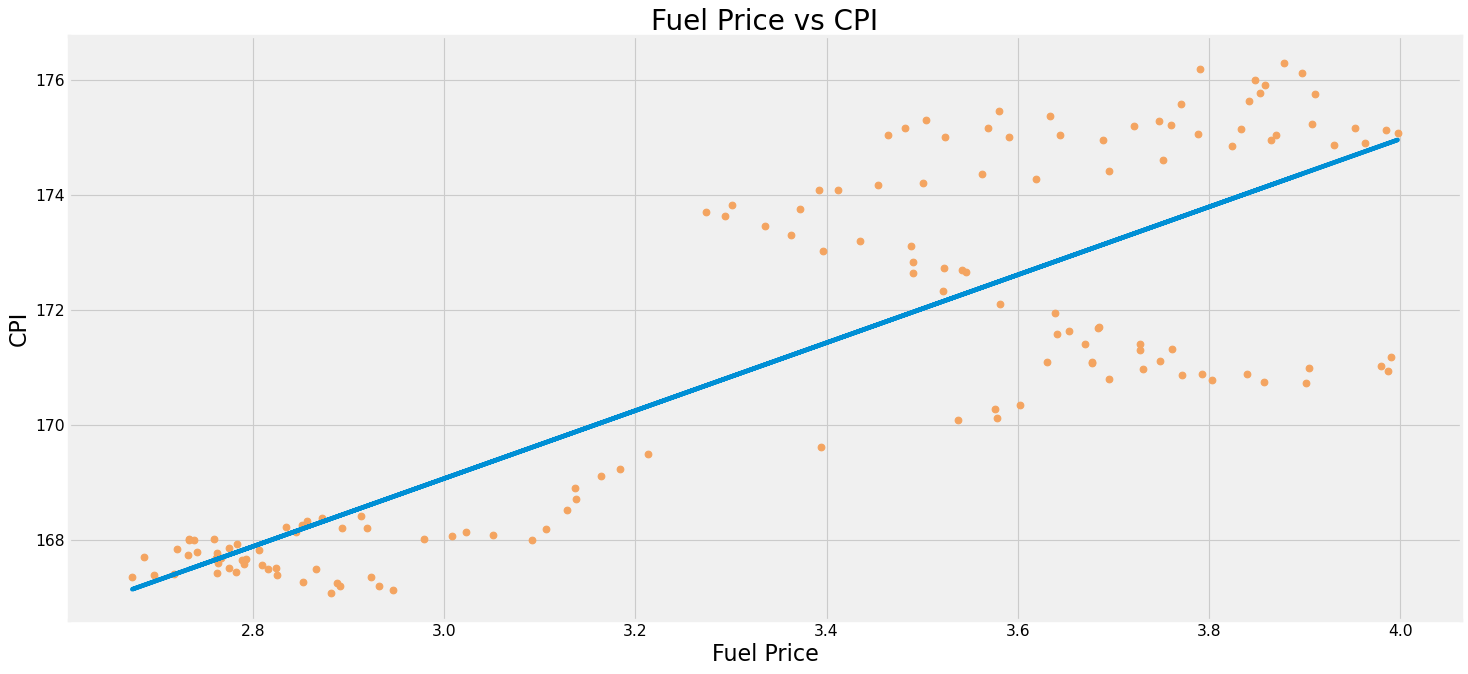

In [42]:
x = grouped_date['Fuel_Price']
y = grouped_date['CPI']


fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'Fuel Price vs CPI', fontsize=25)
plt.xlabel('Fuel Price', fontsize=20)
plt.ylabel('CPI', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

<Figure size 432x288 with 0 Axes>

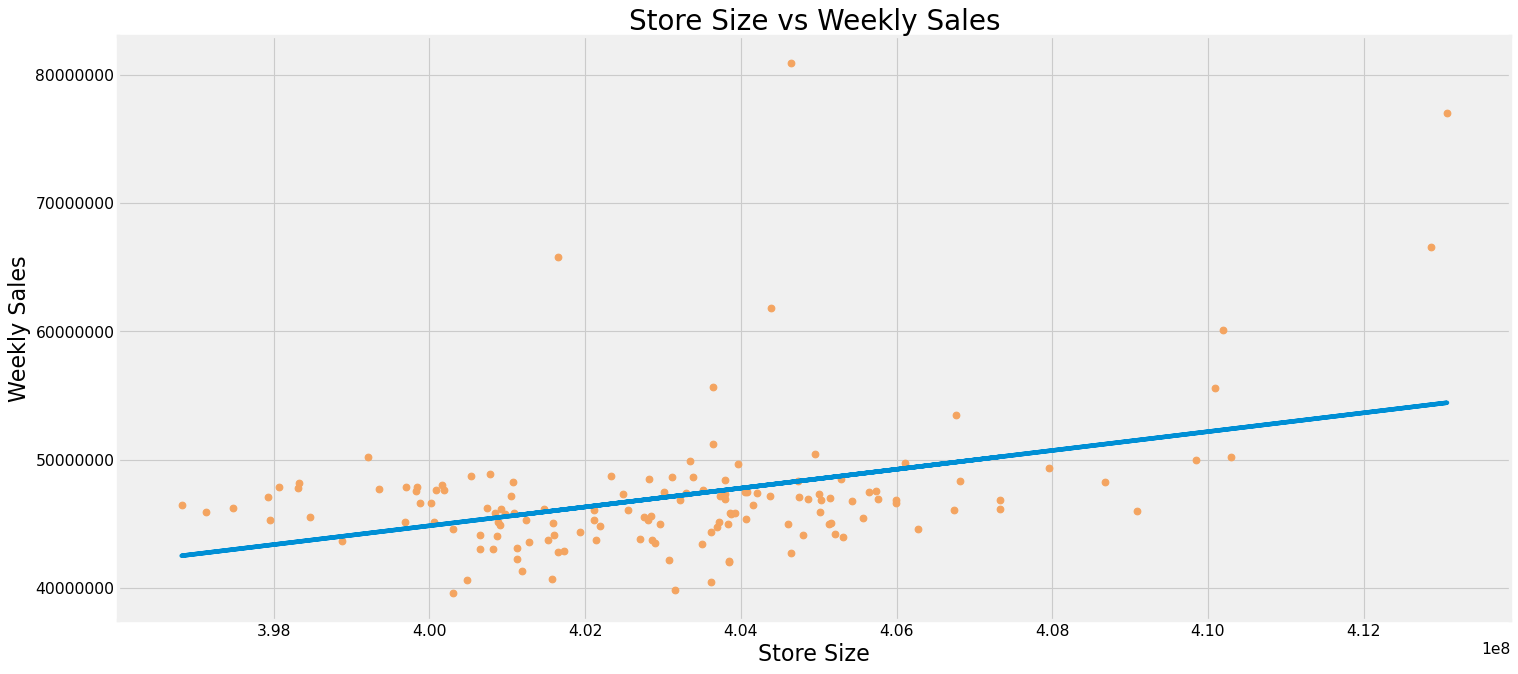

In [43]:
x = grouped_date['Size']
y = grouped_date['Weekly_Sales']

fig = plt.figure()
figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, 'o', color = 'sandybrown')
m,b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, '-')
plt.title(label= 'Store Size vs Weekly Sales', fontsize=25)
plt.xlabel('Store Size', fontsize=20)
plt.ylabel('Weekly Sales', fontsize=20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

# Sales Time-Series Forecasting

In [44]:
grouped_date_index=df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()

In [45]:
train_df = grouped_date_index['Weekly_Sales'].iloc[:52]
test_df = grouped_date_index['Weekly_Sales'].iloc[52:105]

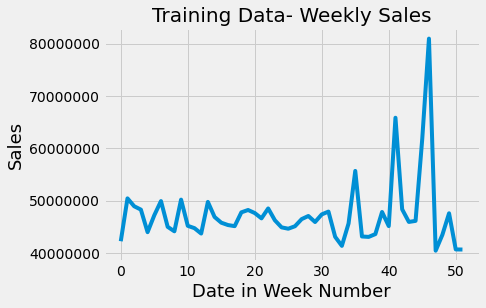

In [46]:
train_df.plot()
plt.xlabel('Date in Week Number', size = 18)
plt.ylabel('Sales', size = 18)
plt.title('Training Data- Weekly Sales', size = 20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

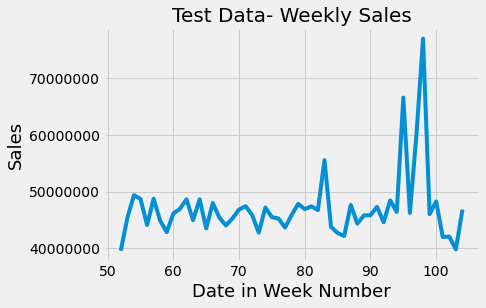

In [47]:
test_df.plot()
plt.xlabel('Date in Week Number', size = 18)
plt.ylabel('Sales', size = 18)
plt.title('Test Data- Weekly Sales', size = 20)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)